# Image Processing SS 20 - Assignment - 01

### Deadline is 29.4.2020 at 12:00

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs without errors, when clicking `Kernel` -> `Restart & Run All`.


## Introduction to Python / Numpy

* [Learn Python in 15 minutes](https://learnxinyminutes.com/docs/python3/): We will use Python 3.
* [Numpy for Matlab Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#general-purpose-equivalents)
* [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

## Libraries

We will use the following libraries:

* matplotlib
* numpy
* scipy
* skimage


# Exercise 0 - Setup Development Enviroment - [1 Point]

Find a partner, follow the steps in the [README](https://github.com/BildverarbeitungSS20/Hausaufgaben/blob/master/README.md) and paste a link to your repository and your names into the KVV assignment box. Also include your names inside your solution.
You do not need to upload any files to MyCampus Whiteboard. I will clone your repository.

In [90]:
# display the plots inside the notebook
%matplotlib inline

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [92]:
from skimage.data import astronaut

In [93]:
img = astronaut()   # Get the image
print(img.shape)    # the dimension of the image
print(img.dtype)    # the image type

(512, 512, 3)
uint8


We have a `(512, 512, 3)` array of unsigned bytes. At `img[x, y]` there are three values for R,G and B.

We will always work with floating point arrays between 0 and 1. 

In [94]:
img = img / 255.

Lets display the image.

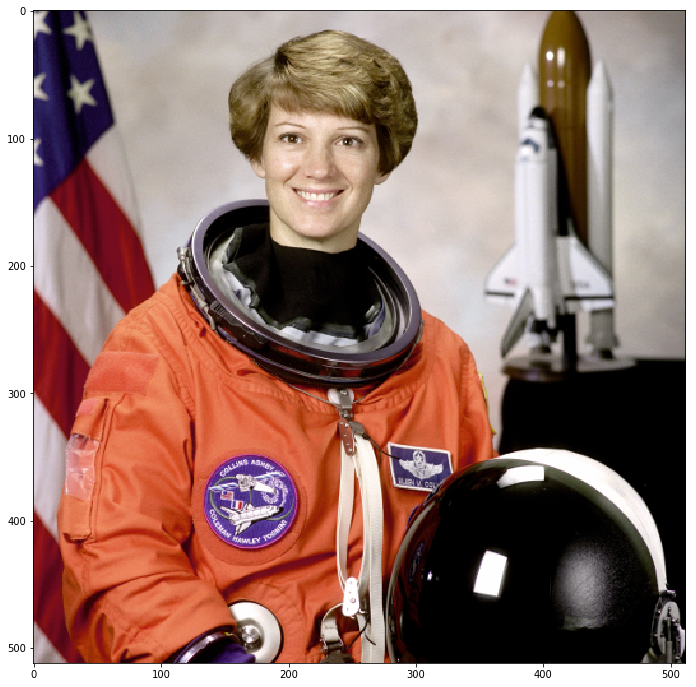

In [95]:
plt.imshow(img)
plt.show()

This is [Eileen Collins](https://en.wikipedia.org/wiki/Eileen_Collins). She was the first astronaut 
 to fly the Space Shuttle through a complete 360-degree pitch maneuver. What an inspiring woman.

## Exercise 1 - Plot -       [1 Point]

Plot the R, G and B channels separately.

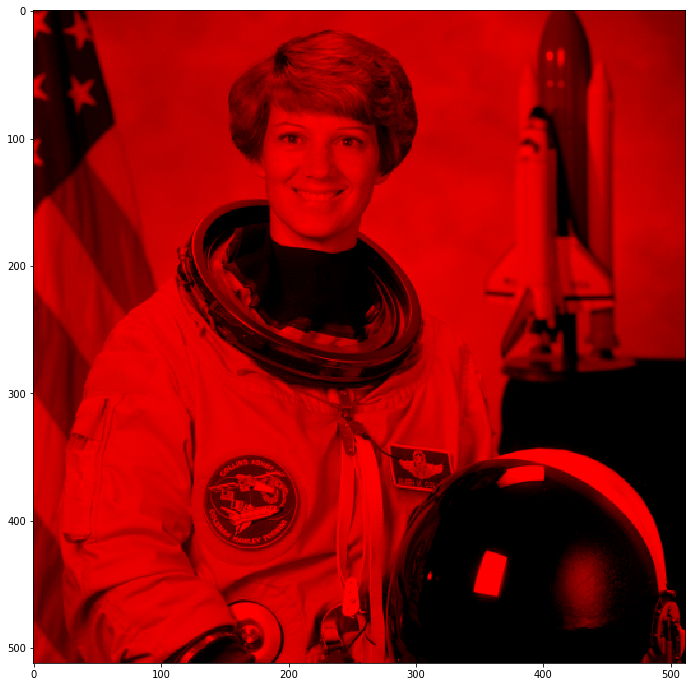

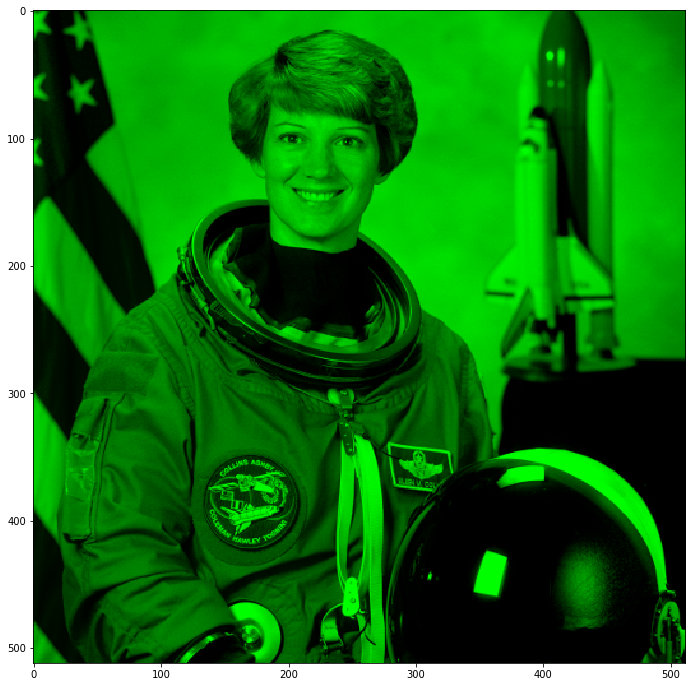

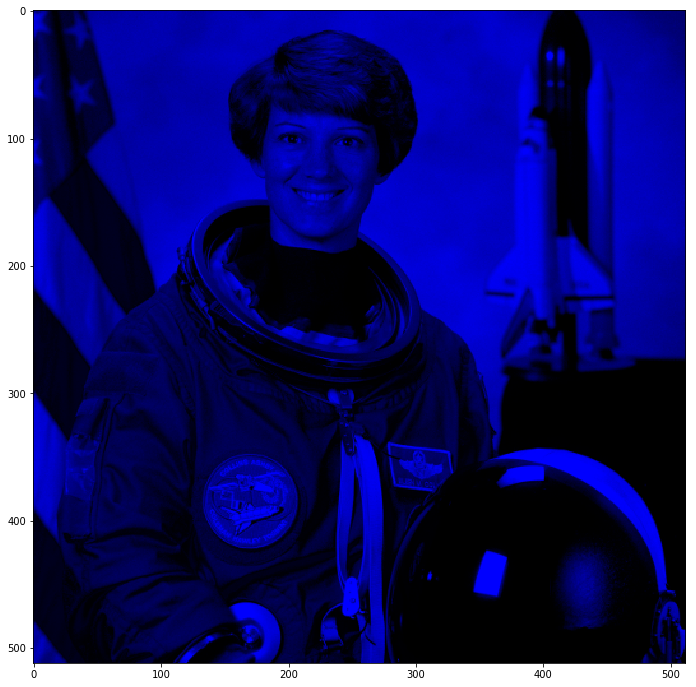

In [96]:
# Your code here 
imgR, imgG, imgB = img.copy(), img.copy() , img.copy()  
 
 
imgR[ : , : , (1,2)] = 0 
imgG[ : , : , (0,2)] = 0 
imgB[ : , : , (0,1)] = 0
 
plt.imshow(imgR) 
plt.show() 
 
plt.imshow(imgG) 
plt.show() 
 
plt.imshow(imgB) 
plt.show()

## Exercise 2 - RGB to HSV [6 Points]

Implement the `rgb_to_hsv` and `hsv_to_rgb` functions. Don't use any color conversion functions from a library.


In [97]:
def rgb_to_hsv(x): 
    MAX = np.amax(x)
    MIN = np.amin(x) 
    R,G,B = x[0],x[1],x[2] 
    H,S,V = 0,0,MAX 
    if(MAX == MIN): 
        H = 0
    elif(MAX == R):
        H = 60 *((G-B) / (MAX - MIN))
    elif(MAX == G):
        H = 60 * (2 + ((B-R)/(MAX - MIN)))
    elif(MAX == B):
        H = 60 * (4 + ((R-G)/(MAX - MIN)))
 
    if(H < 0):
        H = H + 360
    
    if(MAX != 0):
        S = (MAX - MIN)/ MAX
  
    return np.array([H,S,V]) 

In [98]:
import math
def hsv_to_rgb(x):
    """
    Converts the numpy array `x` from HSV to the RGB. 
    """
    # Your code here
    res = []
 
    h,s,v = x[0],x[1],x[2] 
    hi = math.floor(h / 60)
    f = ( (h/60) - hi )

    p = v * (1 - s)
    q = v * (1 - s * f)
    t = v * ( 1 - s * ( 1 - f ) )

    if s == 0:
        res = np.array([v,v,v]) 
 
    elif( hi == 0 or hi == 6 ):
        res = np.array([v,t,p])
 
    elif hi == 1:
        res = np.array([q,v,p])
    elif hi == 2:
        res = np.array([p,v,t])
    elif hi == 3:
        res = np.array([p,q,v])
    elif hi == 4:
        res = np.array([t,p,v])
    elif hi == 5:
        res = np.array([v,p,q])
    return res

Plot the saturation of the astronaut image

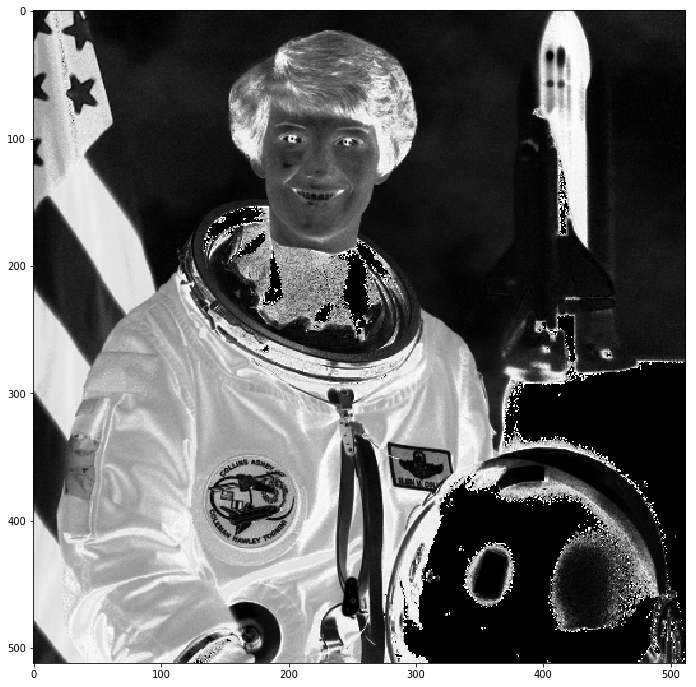

In [99]:
img_as_hsv = np.apply_along_axis(rgb_to_hsv, 2, img) 

img_as_hsv = img_as_hsv[ : , : , [1,1,1]] 
 
plt.imshow( img_as_hsv ) 
plt.show()

Increase the saturation by a factor of 2, convert it back to RGB and plot the result.

In [100]:
def double(x):
    if(x[1] * 2 > 1):
        return np.array([x[0], 1, x[2]])
    else: 
        return np.array([x[0], x[1] * 2, x[2]]) 


img_as_hsv = np.apply_along_axis(rgb_to_hsv, 2, img) 

img_as_hsv = np.apply_along_axis(double,2,img_as_hsv)
img_RGB2 = np.apply_along_axis(hsv_to_rgb, 2, img_as_hsv)


plt.imshow( img_RGB2 ) 
plt.show()
 

UnboundLocalError: local variable 'res' referenced before assignment

## Exercise 3 - Calculation [2 Points]

In the figure below you can see the [CIE-XYZ](https://de.wikipedia.org/wiki/CIE-Normvalenzsystem) color space.
![](https://upload.wikimedia.org/wikipedia/commons/4/49/CIE-Normfarbtafel.png)

What are the approximate x,y,z values for the following Adobe RGB colors:
* `(0, 0.5, 0.5)`
* `(0.33, 0.33, 0.33)`

A sodium-vapor lamp shines with double the intensity of a mercury-vapor lamp
. The light from the sodium lamp only contains 
the spectral line at `589,00nm` and the light from the mercury lamp only the
spectral line at `435,83 nm`.

What color does a human experience? What are the approximate x,y,z values?


In [101]:
def rgb2xyz(x):
    constArray = np.array( [ (0.57667, 0.18556,0.18823), (0.29734 ,0.62736 ,0.07529), (0.02703, 0.07069, 0.99134) ])
    arrayCalcScalar = (1 / 0.17697 ) * constArray
    result = arrayCalcScalar @ x 
    return result

print(rgb2xyz([0, 0.5, 0.5]))
print(rgb2xyz([0.33, 0.33, 0.33]))

[1.05608295 1.98522348 3.00059332]
[1.77234447 1.86470419 2.03079505]


In [102]:
wavelength = ( ( (2/3)*589 + (1/3)*435.83 ) ) 
#wavelength to rgb: https://academo.org/demos/wavelength-to-colour-relationship/
#Wellenlänge entspricht ~583, entspricht somit einem grün Ton
#calculated rgb values
rgb_values = (123, 255, 0)

rgb = [0.482352941, 1, 0] #<- Solution x, y, z values
print(rgb2xyz(rgb))


[2.62032249 4.35544343 0.47311974]
